In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
from features.Pipeline import Pipeline

import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
wave_pipe = Pipeline("waveform")
stft_pipe = Pipeline("stft")
mel_pipe = Pipeline("mel")
mfcc_pipe = Pipeline("mfcc")
cqt_pipe = Pipeline("cqt")

# file_path = '../data/raw/NSynth/audio/bass_synthetic_068-022-075.wav'
file_path = '../data/raw/nsynth-train/audio/bass_acoustic_000-024-025.wav'

wave_spectro = wave_pipe.process(file_path)
stft_spectro = stft_pipe.process(file_path)
mel_spectro = mel_pipe.process(file_path)
mfcc_spectro = mfcc_pipe.process(file_path)
cqt_spectro = cqt_pipe.process(file_path)

In [5]:
print(f'WAVE transformation result shape: {wave_spectro.shape}')
print(f'STFT transformation result shape: {stft_spectro.shape}')
print(f'MEL transformation result shape: {mel_spectro.shape}')
print(f'MFCC transformation result shape: {mfcc_spectro.shape}')
print(f'CQT transformation result shape: {cqt_spectro.shape}')

WAVE transformation result shape: torch.Size([88200])
STFT transformation result shape: torch.Size([513, 173])
MEL transformation result shape: torch.Size([256, 160])
MFCC transformation result shape: torch.Size([20, 173])
CQT transformation result shape: torch.Size([84, 173])


In [6]:
def draw_spectro(spectro):
    mel_spectro = np.abs(spectro)
    power_to_db = librosa.power_to_db(mel_spectro, ref=np.max)
    plt.figure(figsize=(8, 7))
    librosa.display.specshow(power_to_db, sr=22050, x_axis='time', y_axis='mel', cmap='magma', 
    hop_length=512)
    plt.colorbar(label='dB')
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()

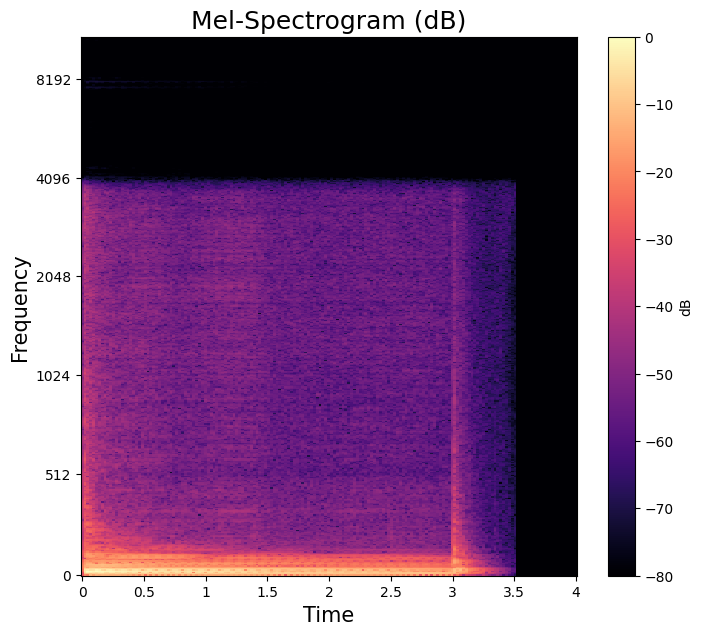

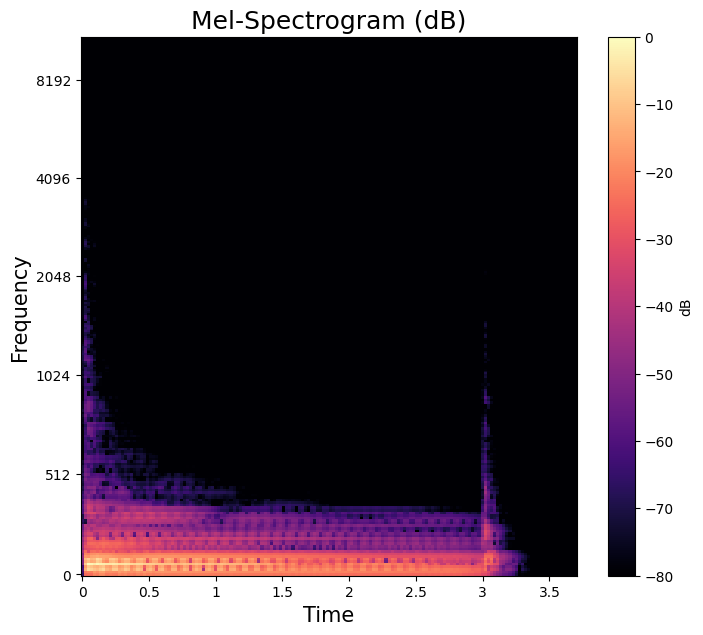

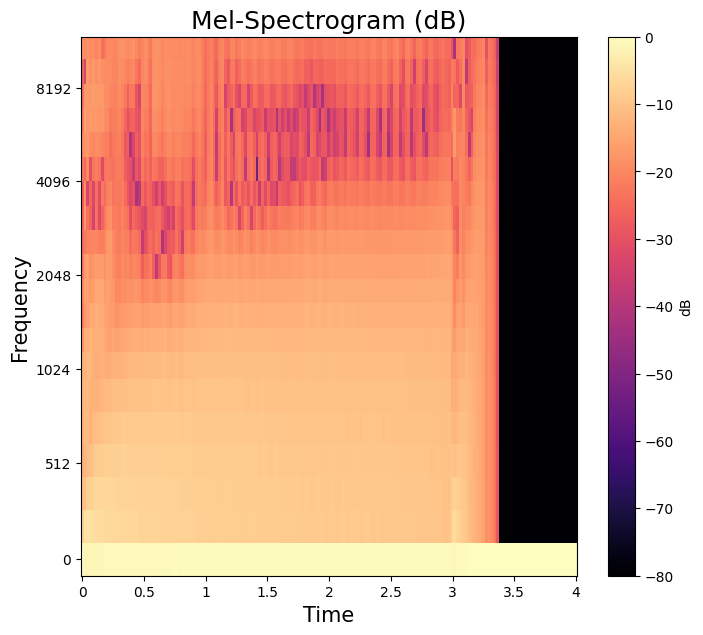

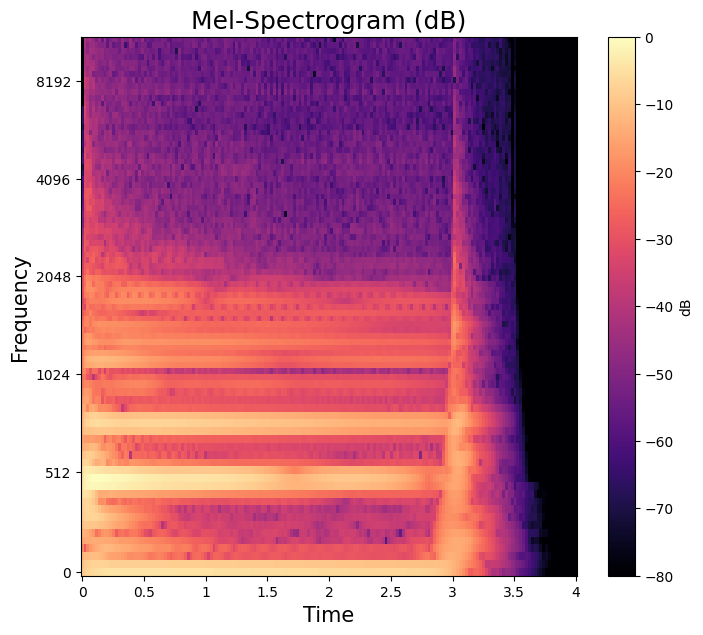

In [7]:
# draw_spectro(wave_spectro)
draw_spectro(stft_spectro)
draw_spectro(mel_spectro)
draw_spectro(mfcc_spectro)
draw_spectro(cqt_spectro)

In [8]:
wave_audio_back = wave_pipe.post_process(wave_spectro)
stft_audio_back = stft_pipe.post_process(stft_spectro)
mel_audio_back = mel_pipe.post_process(mel_spectro)
mfcc_audio_back = mfcc_pipe.post_process(mfcc_spectro)
cqt_audio_back = cqt_pipe.post_process(cqt_spectro)

In [9]:
print(wave_audio_back.shape)
print(stft_audio_back.shape)
print(mel_audio_back.shape)
print(mfcc_audio_back.shape)
print(cqt_audio_back.shape)

(88200,)
(88064,)
(81408,)
(88064,)
(88064,)


In [10]:
print(wave_audio_back)
print(stft_audio_back)
print(mel_audio_back)
print(mfcc_audio_back)
print(cqt_audio_back)

[ 2.3522244e-08 -2.4495870e-09 -1.8077879e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[ 2.3403956e-08 -2.5584115e-09 -1.8180717e-08 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
[-0.00183315 -0.0026312  -0.00224829 ...  0.          0.
  0.        ]
[-2.7135131e-03 -3.1004145e-03 -2.8468589e-03 ... -1.4145806e-04
  7.5425916e-05 -2.9806150e-04]
[6.53186041e-02 6.09135650e-02 5.97059920e-02 ... 2.22576532e-09
 3.03241762e-09 3.67930366e-09]


In [11]:
sf.write('wave_process.wav', data=wave_audio_back, samplerate=wave_pipe.input_sr, subtype='PCM_24')
sf.write('stft_process.wav', data=stft_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
sf.write('mel_process.wav', data=mel_audio_back, samplerate=mel_pipe.input_sr, subtype='PCM_24')
sf.write('mfcc_process.wav', data=mfcc_audio_back, samplerate=mfcc_pipe.input_sr, subtype='PCM_24')
sf.write('cqt_process.wav', data=cqt_audio_back, samplerate=cqt_pipe.input_sr, subtype='PCM_24')